# Matplotlib HowTo
Using the Normal Distribution as an Example.

If you want to use Python in the field of data science / data analysis it is hard to get very far before runing into the [Matplotlib package](<https://matplotlib.org/>).  Pandas uses it as the default plotting back end and also other popular plotting libraries, such as [Seaborn](<https://seaborn.pydata.org/>), are based on it.  If you are looking to get a deep dive into Matplotlib and the Pyplot interface to it, the [Matplotlib tutorials](<https://matplotlib.org/devdocs/tutorials/>) are excellent.  One of the tutorials is a walkththrough of the creation of a horizontal bar chart that they call [The Life Cycle of a Plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py).  I thought that a good way to get more familiar with it would be to create a plot that illustrates a fundamental statistical concept like the Z-score and confidence level and confidence interval.

So let's dive in.  We start by importing the libraries. As is tradition we alias ```Matplotlib.pyplot``` as ```plt```.  If you are in a Jupiter notebook, and want your plots to show up in the same Jupiter notebook use the inline magic ```%matplotlib inline```. 

In [2]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

%matplotlib inline

### The Starting Point: the `Figure` and `Axes` objects

A core object of matplotlib is the `Figure` object. The `Figure` object is the thing that produces the output to the hosting application (os window, Jupiter widget, etc.) Each `Figure` holds 0 or more `Axes` objects. Both the `Figure` object and the `Axes` object has a coordinate system.  The `Axes` object manages the points that will be used to display the plot on the `Figure`. There are a number of ways to create a new figures and axes.  You can create an empty figure by calling the `.figure()` method:

    fig = plt.figure()

Or you can create a 'Figure` and an 'Axes` object at the same time by calling the `.subplots()` method:

    fig, ax = plt.subplots()
    
You can also create multiple `Axes` objects that are all housed in a single `Figure` object by calling `.subplots()` method with arguments as follows:

    fig, axs = plt.subplots(2,2)

In the last case we have a figure with four subplots, arranged in two rows and two columns.  But we will start simply and just create a single `Figure` and a single `Axes` object. 

In [ ]:
# create a figure with a single axes object
fig, ax = plt.subplots()  # create a figure with a single axes object

### Some Simple Methods of the `Axes` objects
Lets explore some often used methods of the `Axes` object.  The `.plot` method is used to draw our plots on the `Figure` There are also a number of `.set_` methods for axes objects that can be used to set the x label, y label, title and legend for the plot.

But before we do that we have to set up the data that we would like to plot.  The plot that I want to use as an example is the Normal Distribution:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\Large{e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}}$$

Which we get from:

    scipy.stats.norm(x, loc=mu, scale=sigma) # the normal distribution

We are going to use a `.plot()` command in order to plot the Normal Distribution.  The `.plot()` command can be used in many ways.  In this example we will  pass in an array of x values, and our Normal Distributions probability density function to be used to calculate the y values, and the `.plot()` command will generate a curve built up of line segments between the `(x,norm.pdf(x))` pairs. Thus to begin we first need to create an array of points that will be the x-coordinates of our plotted data.

In [3]:
# Create an array of points to use as the x-coordinates for plotting the normal distribution
x_min = norm.ppf(0.000005) # we will plot 99.999 % of the normal curve.
x_max = norm.ppf(0.999995)
x = np.linspace(x_min, x_max, 201)

And with that we are ready to do some plotting.

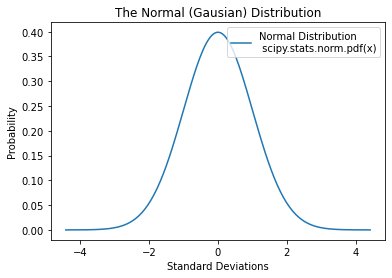

In [4]:
# create a figure with a single axes object
fig, ax = plt.subplots()

# plot our normal function.
ax.plot(x, norm.pdf(x), label='Normal Distribution\n scipy.stats.norm.pdf(x)')

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')
ax.legend()

plt.savefig('first_figure.png', bbox_inches='tight')

### Changing the Style

Well, that was easy.  Just a handful of lines and we get a serviceable representation of the plots that we want to see.  But perhaps there are some things that we want to change.  We might want to add some space around the actual plots so that they do not run into the ```spines```.  Or we might want the plot to be larger.  We might want to have the background in the ```legend``` be transparent or partially transparent.  All of these things are changeable and more.  But before going too deep on individual customization, you should look at the built in styles.  The ```plt.style.use()``` method is how we restyle our output.  To find out what styles are available we use the, well, the ```.available``` property of the style object.

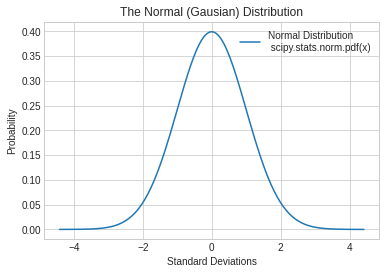

In [5]:
plt.style.use('seaborn-whitegrid')
# create a figure and an axes
fig, ax = plt.subplots()

# plot our normal function.
ax.plot(x, norm.pdf(x), label='Normal Distribution\n scipy.stats.norm.pdf(x)')

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')
ax.legend()

plt.savefig('seaborn-whitegrid figure.png', bbox_inches='tight')


Let's put some additional visualizations onto our `Axes`. For instance the $−1.96\sigma$ and $1.96\sigma$ points on the curve and while we are at it, some vertical lines projecting down from those points. To add points we use the same `.plot` command we used above, except this time we only need to supply a single x value and the corresponding y value rather than an array of x values and a function to compute y values. We can choose what sort of marker to use for points with the `marker='o'` option and we can adjust transparency with `alpha=%`. We could also use the `.plot` method to add the vertical lines,  but there is also a `matplotlib.pyplot.vlines()` method shown below.

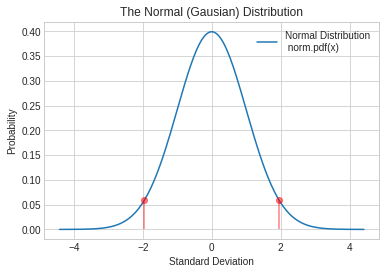

In [6]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes
fig, ax = plt.subplots()

# plot our normal function.
ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
# x=list of x coords for the lines
# ymin is the lower bounds for the lines
# ymax the upper bounds.
ax.vlines(x=[-1.96, 1.96],
          ymin=[0, 0],
          ymax=[norm.pdf(-1.96), norm.pdf(1.96)],
          color='red',
          alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')
ax.legend(loc='upper right')

plt.savefig('second figure.png', bbox_inches='tight')

Now let's add another plot to our figure.  However this time we want to plot the Cumulative Density Function (CDF) for our Normal distribution.  Recall that the CDF is defined for the same x values as the PDF, however the CDF gives us for any value x, the percentage of the area under the PDF.  So the y values for the CDF range from $[0,1]$.  If we just add

    ax.plot(x, norm.cdf(x), label='Cumulative Distribution Function\n norm.cdf(x)', lw=2)

and plot it we get the following:

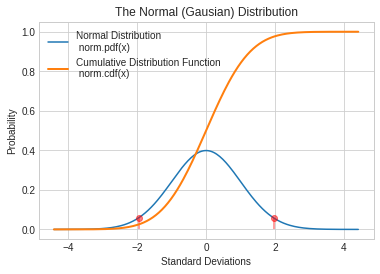

In [7]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes
fig, ax = plt.subplots()

# plot our normal function.
ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# plot the CDF
ax.plot(x, norm.cdf(x), label='Cumulative Distribution Function\n norm.cdf(x)', lw=2)[0]

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')
ax.legend()

plt.savefig('bad figure.png', bbox_inches='tight')

Well, it is not quite what we want.  But it is close.  The CDF should have a different y axis than our PDF, but share the same x axis.  To fix that we can create a second `Axes` object that has a shared x axis with our first `Axes` object by using the `ax2 = ax.twinx()` method.

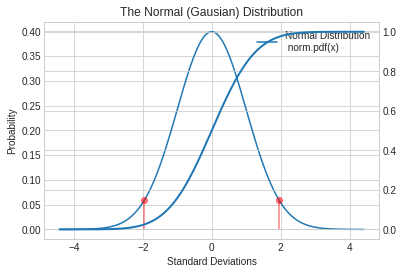

In [8]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes
fig, ax = plt.subplots()

# plot our normal function.
ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# Plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution Function\n norm.cdf(x)', lw=2)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')
ax.legend()

#plt.show()
plt.savefig('bad figure_2.png', bbox_inches='tight')

Notice a few things about this.  Now, our legend no longer lists the CDF, just the PDF.  We can fix that by instead of having an Axes level legend having a figure level legend `fig.legend()`.

However we need to be a bit careful as `pyplot` will not be able to place the legend in a great place by default.  So we have to do a bit more customization.  You can customize the font size, the transparency as `alpha=%`, the location and the bounding box to anchor (x, y coordinates are relative to the entire figure and by default are the percentage of width and height of the full figure).

    # customize our legend
    fig.legend(
        fontsize='small',
        loc='upper left',
        framealpha=0.5,
        bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the figure
    )

Another thing we might want to address is the scale on the right.  While it might be clear from context that the scale going from 0 to 1 is actually a percentage, let's make that explicit on our axis.  We do that by importing the ticker object from matplotlib 

    import matplotlib.ticker as mtick

And then we can set our major tics as follows:

    # format that axis as a percentage.
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

In [9]:
import matplotlib.ticker as mtick

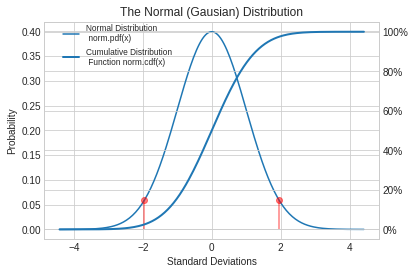

In [10]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution\n Function norm.cdf(x)', lw=2)

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)

plt.savefig('third figure.png', bbox_inches='tight')

### Adding Text

If we would like to add some text on our figure we can use the [```.text()```](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) method.  It's call signature is:
    
    matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)
    
Where, ```x,y``` are the position to place the text, and ```s``` is the string to put on the figure.  There is a dictionary that we can pass with font specifications and the ```**kwargs``` are keyword based text properties.  We will use the defaults in our example.
    

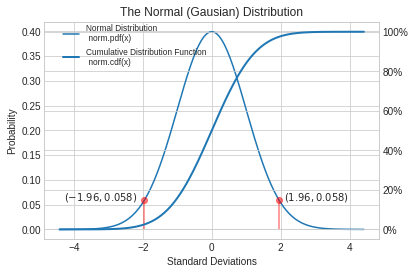

In [11]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution Function\n norm.cdf(x)', lw=2)

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)
# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-4.3, norm.pdf(-1.96), '$(-1.96, {0:.2})$'.format(norm.pdf(-1.96)))
ax.text(2.1, norm.pdf(1.96), '$(1.96, {0:.2})$'.format(norm.pdf(1.96)))

plt.savefig('fourth figure.png', bbox_inches='tight')

### Filling an Area

We can also shade regions of our plots.  We use the [```.fill_between()```](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html?highlight=fill_between#matplotlib.pyplot.fill_between) method which takes three arrays: the common x-coordinates, the y1 and y2 coordinates of the two plots to shade between.  The ```y2``` function is optional.  If you do not supply one, the default is to use the zero function.

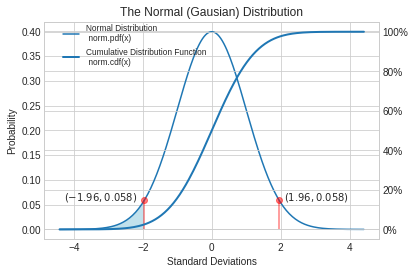

In [12]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution Function\n norm.cdf(x)', lw=2)

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-4.3, norm.pdf(-1.96), '$(-1.96, {0:.2})$'.format(norm.pdf(-1.96)))
ax.text(2.1, norm.pdf(1.96), '$(1.96, {0:.2})$'.format(norm.pdf(1.96)))

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, norm.ppf(0.025))
ax.fill_between(x2, norm.pdf(x2), alpha=0.75, facecolor='lightblue')

plt.savefig('fifth figure.png', bbox_inches='tight')

### Text with an Arrow is called an Annotation

There is a way to [```.annotate()```](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html?highlight=annotate#matplotlib.pyplot.annotate) a figure using a text box, and an arrow.  The signature for the ```.annotate()``` method is:

    matplotlib.pyplot.annotate(text, xy, *args, **kwargs)

Where ```xy : (float, float)``` is the point to annotate.  A useful optional argument is ```xytext : (float, float)``` which is the point at which the text will be placed.

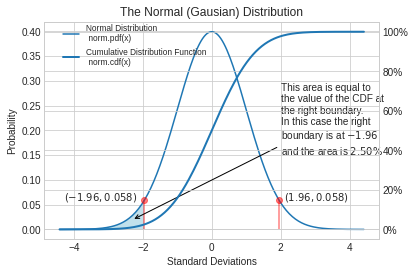

In [14]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution Function\n norm.cdf(x)', lw=2)

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-4.3, norm.pdf(-1.96), '$(-1.96, {0:.2})$'.format(norm.pdf(-1.96)))
ax.text(2.1, norm.pdf(1.96), '$(1.96, {0:.2})$'.format(norm.pdf(1.96)))

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, norm.ppf(0.025))
ax.fill_between(x2, norm.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96$\n'
text_string += 'and the area is $2.50\%$'
ax.annotate(
    text_string,
    xy=(-2.3, norm.pdf(-1.96)/3),
    xytext=(2,0.15),
    arrowprops=dict(arrowstyle='->'))

plt.savefig('sixth figure.png', bbox_inches='tight')

While the note is helpful, let's make it more concrete by putting up a horizontal dashed line that extends to the right spine with the percentage axis on it.

    # add a horizontal line from the CDF to the right axis and a point at the intersection
    ax2.hlines(y=norm.cdf(-1.96), xmin=-1.96, xmax=6, alpha=0.5)
    ax2.plot(-1.96, norm.cdf(-1.96), marker='o', color='blue', alpha=0.4)

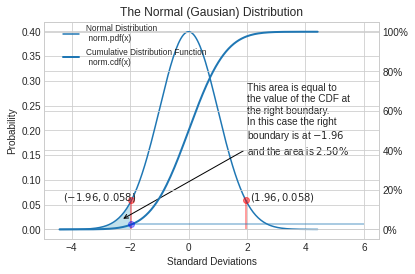

In [18]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution Function\n norm.cdf(x)', lw=2)

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-4.3, norm.pdf(-1.96), '$(-1.96, {0:.2})$'.format(norm.pdf(-1.96)))
ax.text(2.1, norm.pdf(1.96), '$(1.96, {0:.2})$'.format(norm.pdf(1.96)))

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, norm.ppf(0.025))
ax.fill_between(x2, norm.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96$\n'
text_string += 'and the area is $2.50\%$'
ax.annotate(
    text_string,
    xy=(-2.3, norm.pdf(-1.96)/3),
    xytext=(2,0.15),
    arrowprops=dict(arrowstyle='->'))

# add a horizontal line from the CDF to the right axis and a point at the intersection
ax2.hlines(y=norm.cdf(-1.96), xmin=-1.96, xmax=6, alpha=0.5)
ax2.plot(-1.96, norm.cdf(-1.96), marker='o', color='blue', alpha=0.4)

plt.savefig('seventh figure.png', bbox_inches='tight')

Let's add one more bit of text to the figure to dirve home the point about the CDF.  The text will be the value of the CDF curve at our horizontal line.

    # add text to highlight the value of the CDF at -0.96
    ax2.text(5,0.04, '$2.5\%$'.format(norm.cdf(-1.96)))

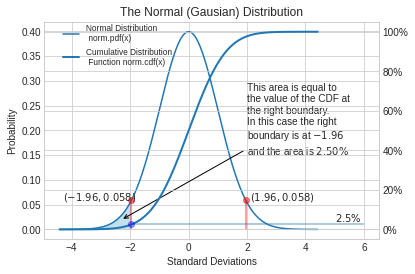

In [35]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution\n Function norm.cdf(x)', lw=2)

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-4.3, norm.pdf(-1.96), '$(-1.96, {0:.2})$'.format(norm.pdf(-1.96)))
ax.text(2.1, norm.pdf(1.96), '$(1.96, {0:.2})$'.format(norm.pdf(1.96)))

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, norm.ppf(0.025))
ax.fill_between(x2, norm.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96$\n'
text_string += 'and the area is $2.50\%$'
ax.annotate(
    text_string,
    xy=(-2.3, norm.pdf(-1.96)/3),
    xytext=(2,0.15),
    arrowprops=dict(arrowstyle='->'))

# add a horizontal line from the CDF to the right axis and a point at the intersection
ax2.hlines(y=norm.cdf(-1.96), xmin=-1.96, xmax=6, alpha=0.5)
ax2.plot(-1.96, norm.cdf(-1.96), marker='o', color='blue', alpha=0.4)

# add text to highlight the value of the CDF at -0.96
ax2.text(5,0.04, '$2.5\%$'.format(norm.cdf(-1.96)))

#plt.show()
plt.savefig('eighth figure.png', bbox_inches='tight')

And there we have a plot showing how the CDF gives us a way to calculate the area under the normal curve that is less than a spceified x value.

There is one more thing that we might want to change to make things easier to read.  The two `Axes` objects have the same color, as do the two `.plot()` objects.  To address the second issue we can modify our plot command, and the dot on the CDF.

    2 = ax2.plot(x, norm.cdf(x), label='Cumulative Distribution\n Function norm.cdf(x)', lw=2, color='green'
    
To address the first we use the `Axes.grid()` method.  If we do call the `Axes.grid()` method we have to tell the gird to be shown, and we can tell what `alpha=%` to use.

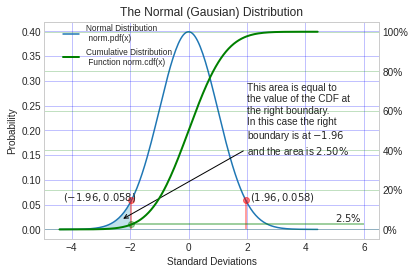

In [37]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# Create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution\n Function norm.cdf(x)', lw=2, color='green')

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gausian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-4.3, norm.pdf(-1.96), '$(-1.96, {0:.2})$'.format(norm.pdf(-1.96)))
ax.text(2.1, norm.pdf(1.96), '$(1.96, {0:.2})$'.format(norm.pdf(1.96)))

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, norm.ppf(0.025))
ax.fill_between(x2, norm.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96$\n'
text_string += 'and the area is $2.50\%$'
ax.annotate(
    text_string,
    xy=(-2.3, norm.pdf(-1.96)/3),
    xytext=(2,0.15),
    arrowprops=dict(arrowstyle='->'))

# add a horizontal line from the CDF to the right axis and a point at the intersection
ax2.hlines(y=norm.cdf(-1.96), xmin=-1.96, xmax=6, color='green', alpha=0.5)
ax2.plot(-1.96, norm.cdf(-1.96), marker='o', color='green', alpha=0.4)

# add text to highlight the value of the CDF at -0.96
ax2.text(5,0.04, '$2.5\%$'.format(norm.cdf(-1.96)))

ax.grid(visible=True, color='blue', alpha=.3)
ax2.grid(visible=True, color='green', alpha=0.3)
#plt.show()
plt.savefig('nineth figure.png', bbox_inches='tight')